In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Extraction

In [2]:
df = pd.read_csv('/kaggle/input/most-selling-pc-games/Games.csv')

In [3]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.7+ KB


In [5]:
df.describe()

,Sales
count,175.000000
mean,3.141143
std,4.960513
min,1.000000
25%,1.000000
50%,1.500000
75%,3.000000
max,42.000000


In [6]:
df.dropna(inplace=True)

## Exploratory Data Analysis

### Which genre is the most popular ?

<AxesSubplot:xlabel='Genre'>

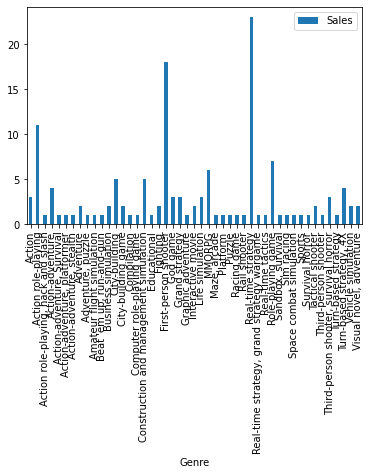

In [7]:
df.pivot_table(index=['Genre'], values=['Sales'], aggfunc='count').plot.bar()

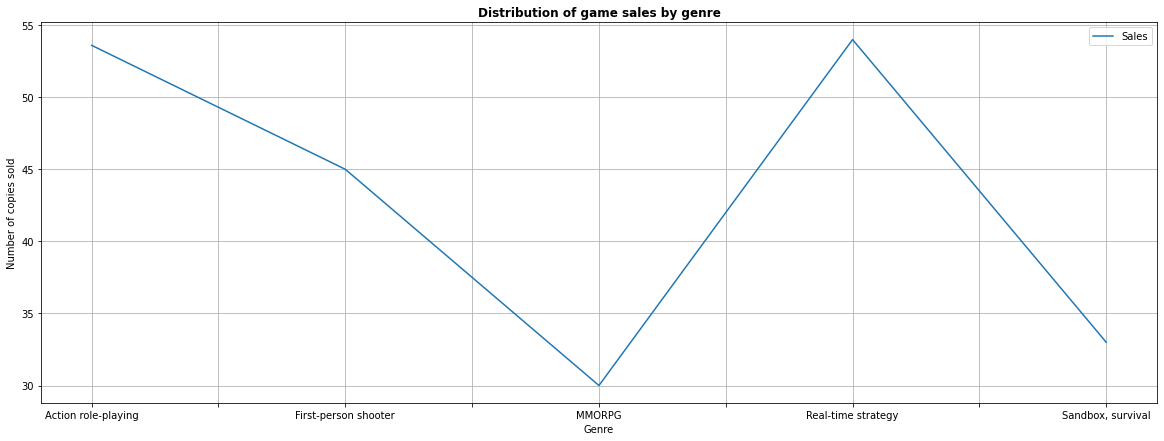

In [8]:
test_top_genres = (df.pivot_table(index = 'Genre', values = 'Sales', aggfunc = 'sum').reset_index()
                .sort_values(by = 'Sales', ascending = False).head())['Genre']

(df
    .query('Genre in @test_top_genres')
    .pivot_table(index=['Genre'], values=['Sales'], aggfunc='sum')
    .reset_index()
    .plot(x='Genre', y='Sales', kind='line', grid=True, figsize=(20, 7))
)

plt.title('Distribution of game sales by genre', fontweight="bold")
plt.xlabel('Genre')
plt.ylabel('Number of copies sold')
plt.show()

We can notice that the most sold genres are Action role-playing and Real time-strategy, despite the fact that there are several times more games of the Real time-strategy genre than Action role-playing.

### Сonclusion

**The highest number of game genre is Real-time strategy.**

### Which publisher published most of the games ?

<AxesSubplot:xlabel='Publisher'>

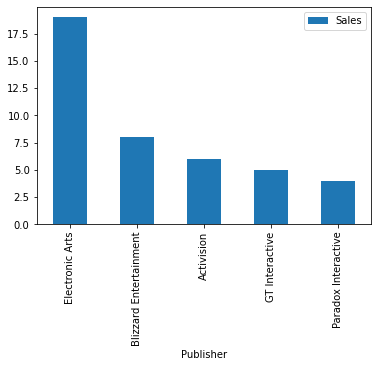

In [9]:
df.pivot_table(index=['Publisher'], values=['Sales'], aggfunc='count').sort_values(by='Sales', ascending=False).head().plot.bar()

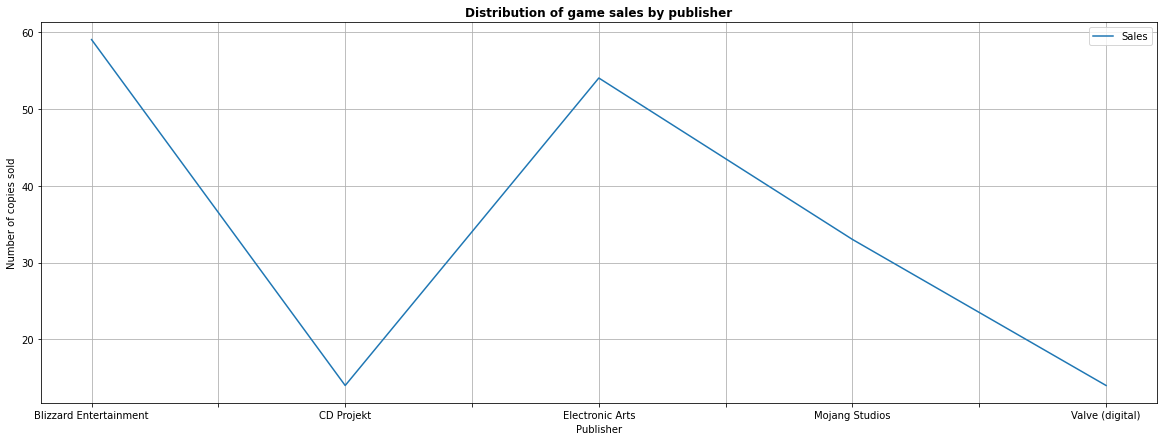

In [10]:
test_top_publisher = (df.pivot_table(index='Publisher', values='Sales', aggfunc='sum').reset_index()
                .sort_values(by='Sales', ascending = False).head())['Publisher']

(df
    .query('Publisher in @test_top_publisher')
    .pivot_table(index=['Publisher'], values=['Sales'], aggfunc='sum')
    .reset_index()
    .plot(x='Publisher', y='Sales', kind='line', grid=True, figsize=(20, 7))
)

plt.title('Distribution of game sales by publisher', fontweight="bold")
plt.xlabel('Publisher')
plt.ylabel('Number of copies sold')
plt.show()

We can notice that the best-selling publisher is Blizzard Entertainment, despite the fact that there are several times more games from the publisher Electronic Arts.

### Conclusion

**The highest number of game publisher is Electronic Arts.**

### Which developer developed most of the games ?

<AxesSubplot:xlabel='Developer'>

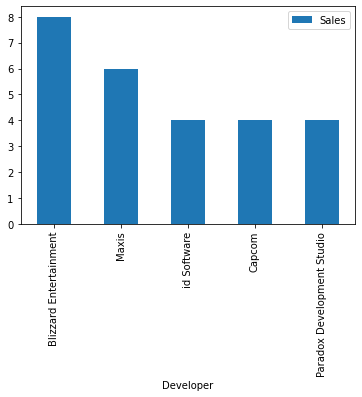

In [11]:
df.pivot_table(index=['Developer'], values=['Sales'], aggfunc='count').sort_values(by='Sales', ascending=False).head().plot.bar()

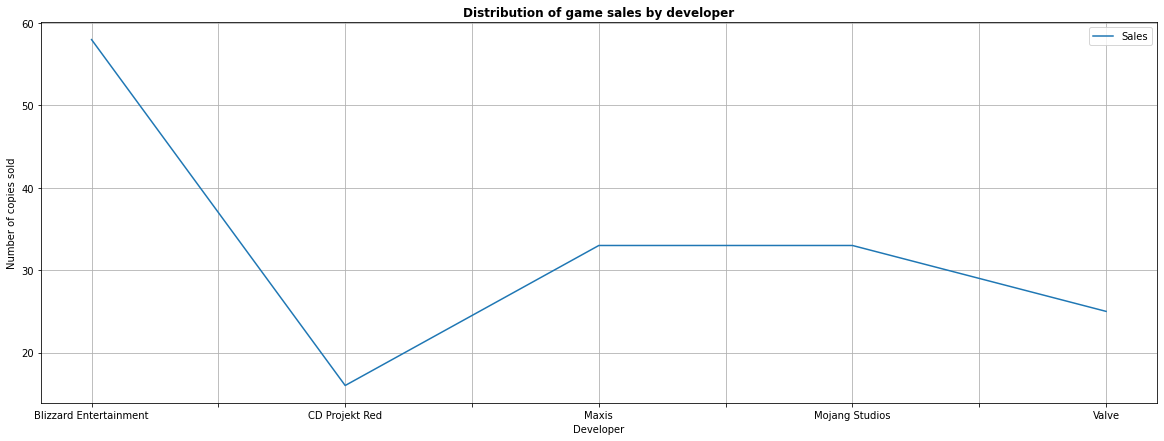

In [12]:
test_top_developer = (df.pivot_table(index='Developer', values='Sales', aggfunc='sum').reset_index()
                .sort_values(by='Sales', ascending = False).head())['Developer']

(df
    .query('Developer in @test_top_developer')
    .pivot_table(index=['Developer'], values=['Sales'], aggfunc='sum')
    .reset_index()
    .plot(x='Developer', y='Sales', kind='line', grid=True, figsize=(20, 7))
)

plt.title('Distribution of game sales by developer', fontweight="bold")
plt.xlabel('Developer')
plt.ylabel('Number of copies sold')
plt.show()

We can notice that the best-selling developer is Blizzard Entertainment, and with a clear separation from all the others.

### Conclusion

The highest number of game developer is Blizzard Entertainment.

### Which series is the most popular?

<AxesSubplot:xlabel='Series'>

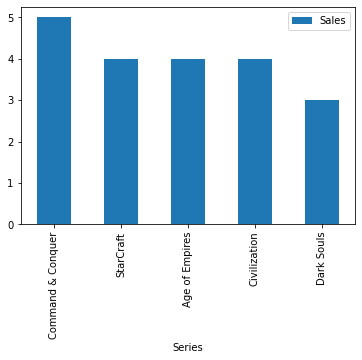

In [13]:
df.pivot_table(index=['Series'], values=['Sales'], aggfunc='count').sort_values(by='Sales', ascending=False).head().plot.bar()

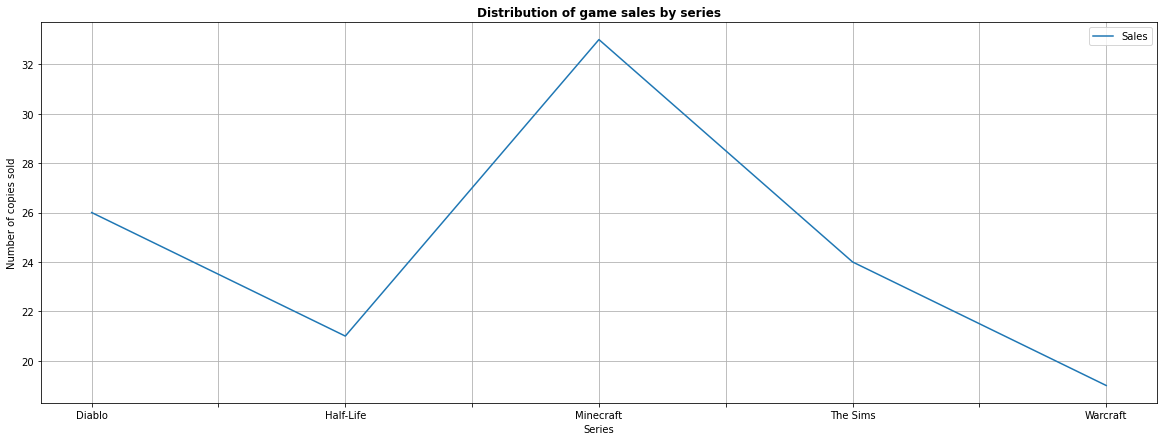

In [14]:
test_top_series = (df.pivot_table(index='Series', values='Sales', aggfunc='sum').reset_index()
                .sort_values(by='Sales', ascending = False).head())['Series']

(df
    .query('Series in @test_top_series')
    .pivot_table(index=['Series'], values=['Sales'], aggfunc='sum')
    .reset_index()
    .plot(x='Series', y='Sales', kind='line', grid=True, figsize=(20, 7))
)

plt.title('Distribution of game sales by series', fontweight="bold")
plt.xlabel('Series')
plt.ylabel('Number of copies sold')
plt.show()

We can notice that the best-selling Series is the Minecraft Series, and with a clear separation from all the others.

### Conclusion

The highest number of game series is Command & Conquer.

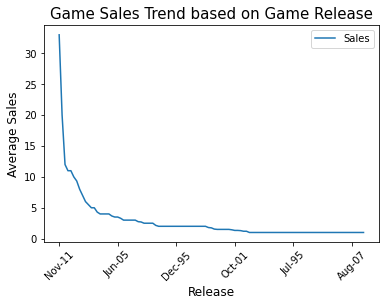

In [15]:
sales = df.pivot_table(index='Release', values = 'Sales', aggfunc = np.mean).sort_values(by='Sales', ascending=False)                                                                                                         
time = sales.sort_values(by='Sales', ascending = False).plot(kind = 'line')
time.set_xticklabels(time.get_xticklabels(), rotation = 45)
plt.title('Game Sales Trend based on Game Release', fontsize = 15, loc = 'center')
plt.xlabel('Release', fontsize = 12)
plt.ylabel('Average Sales', fontsize = 12)
plt.show()